### Importing Required Libraries

In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Log File

In [2]:
# Define the path to the log file
log_file = 'detection_metrics.log'

# Initialize lists to store data
fps_with_roi, fps_without_roi = [], []
num_objects, confidence_scores, velocities = [], [], []

# Regular expressions to extract relevant metrics
fps_roi_pattern = r"FPS with ROI: (\d+\.\d+)"
fps_no_roi_pattern = r"FPS without ROI: (\d+\.\d+)"
objects_pattern = r"Total objects detected: (\d+)"
confidence_pattern = r"Confidence: (\d+\.\d+)"
velocity_pattern = r"Velocity: \[([-+]?\d+)\s([-+]?\d+)\]"

# Read and parse the log file
with open(log_file, 'r') as f:
    for line in f:
        # Extract FPS with ROI
        match = re.search(fps_roi_pattern, line)

        if match:
            fps_with_roi.append(float(match.group(1)))

        # Extract FPS without ROI
        match = re.search(fps_no_roi_pattern, line)

        if match:
            fps_without_roi.append(float(match.group(1)))

        # Extract number of objects detected
        match = re.search(objects_pattern, line)

        if match:
            num_objects.append(int(match.group(1)))

        # Extract confidence scores
        match = re.search(confidence_pattern, line)

        if match:
            confidence_scores.append(float(match.group(1)))

        # Extract velocities
        match = re.search(velocity_pattern, line)

        if match:
            velocities.append((int(match.group(1)), int(match.group(2))))

# Find the length of the shortest list
min_length = min(len(num_objects), len(fps_with_roi), len(fps_without_roi), len(confidence_scores))

# Truncate all lists to the same length
num_objects = num_objects[:min_length]
fps_with_roi = fps_with_roi[:min_length]
fps_without_roi = fps_without_roi[:min_length]
confidence_scores = confidence_scores[:min_length]

# Create a DataFrame to organize the parsed data
data = pd.DataFrame({
    'Objects_Detected': num_objects,
    'FPS_with_ROI': fps_with_roi,
    'FPS_without_ROI': fps_without_roi,
    'Confidence_Scores': confidence_scores,
})

### Line Plot for FPS Comparison (With and Without ROI)

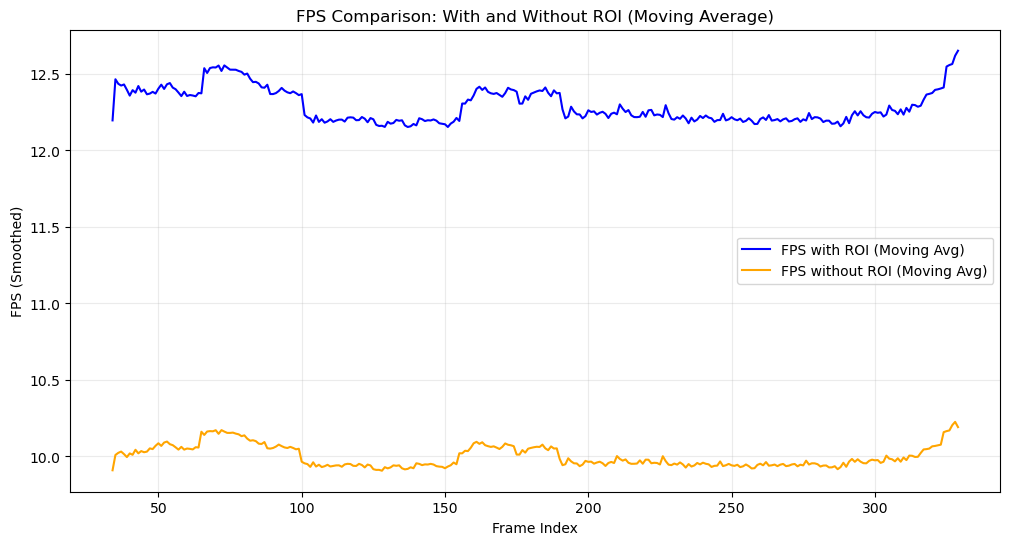

In [3]:
window_size = 35  # Adjust this window size based on the data size
data['FPS_with_ROI_avg'] = data['FPS_with_ROI'].rolling(window_size).mean()
data['FPS_without_ROI_avg'] = data['FPS_without_ROI'].rolling(window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['FPS_with_ROI_avg'], label='FPS with ROI (Moving Avg)', color='blue')
plt.plot(data['FPS_without_ROI_avg'], label='FPS without ROI (Moving Avg)', color='orange')
plt.title('FPS Comparison: With and Without ROI (Moving Average)')
plt.xlabel('Frame Index')
plt.ylabel('FPS (Smoothed)')
plt.legend()
plt.grid(True, alpha=0.25)
plt.show()

### Violin Plot for FPS Distribution

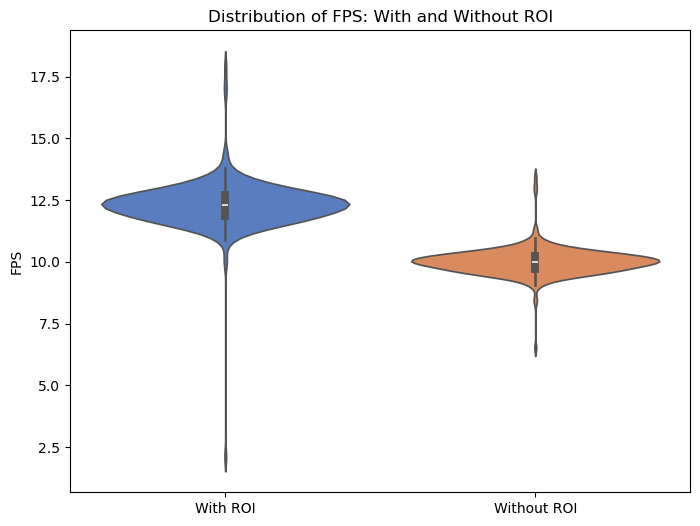

In [4]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=[data['FPS_with_ROI'], data['FPS_without_ROI']], palette='muted')
plt.xticks([0, 1], ['With ROI', 'Without ROI'])
plt.title('Distribution of FPS: With and Without ROI')
plt.ylabel('FPS')
plt.show()

### Bar Plot of Total Objects Detected per Frame

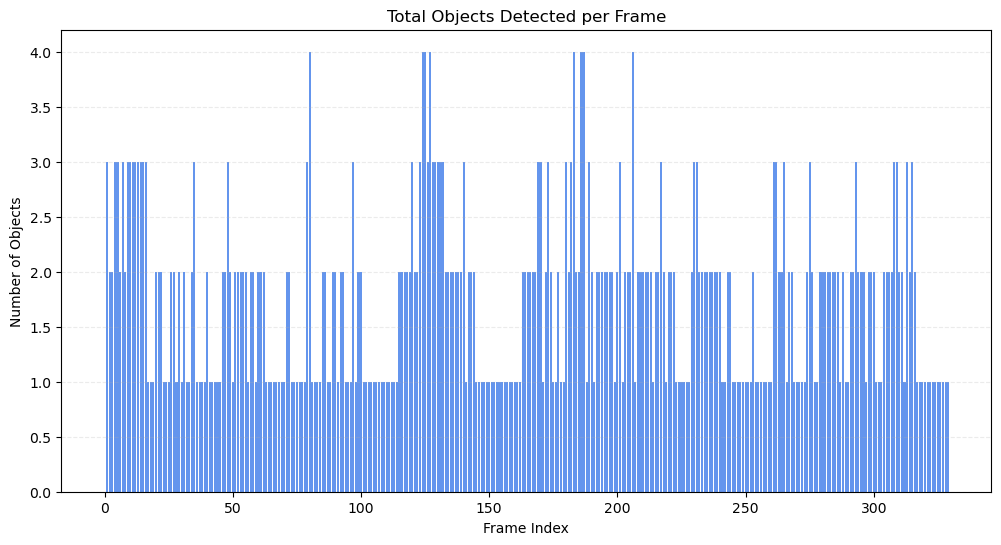

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Objects_Detected'], color='cornflowerblue')
plt.title('Total Objects Detected per Frame')
plt.xlabel('Frame Index')
plt.ylabel('Number of Objects')
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.show()

### Confidence Score Time Series (Line Plot)

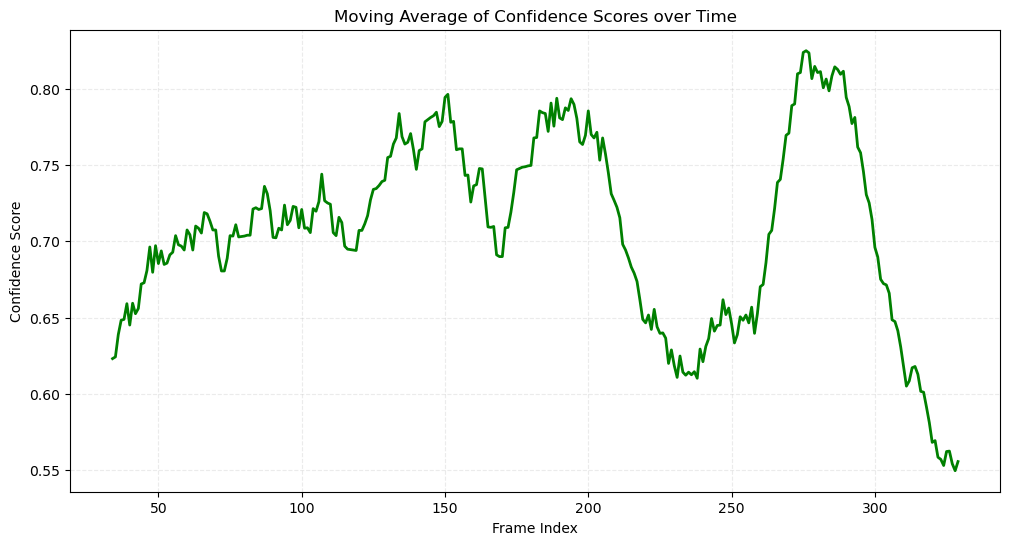

In [6]:
window_size = 35  # Adjust this window size based on the data size
data['Smoothed_Confidence'] = data['Confidence_Scores'].rolling(window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Smoothed_Confidence'], color='green', linewidth=2)
plt.title('Moving Average of Confidence Scores over Time')
plt.xlabel('Frame Index')
plt.ylabel('Confidence Score')
plt.grid(True, linestyle='--', alpha=0.25)
plt.show()

### Scatter Plot for Object Trajectory Patterns (Position Change)

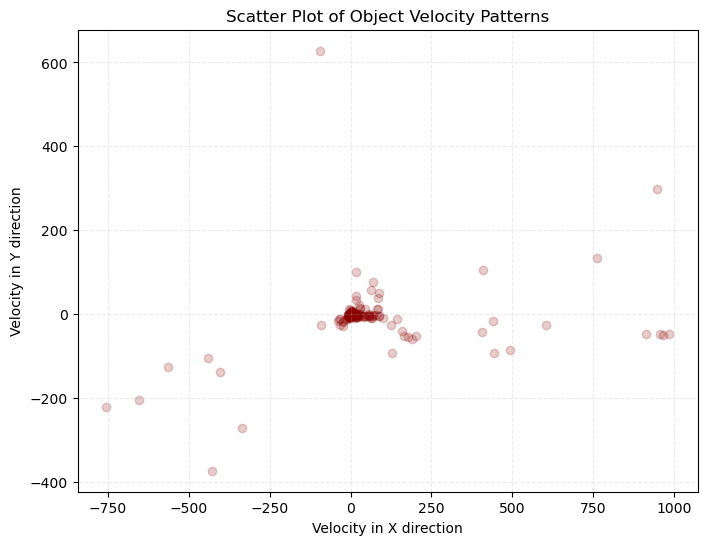

In [7]:
velocities_x = [v[0] for v in velocities]
velocities_y = [v[1] for v in velocities]

plt.figure(figsize=(8, 6))
plt.scatter(velocities_x, velocities_y, color='darkred', alpha=0.2)
plt.title('Scatter Plot of Object Velocity Patterns')
plt.xlabel('Velocity in X direction')
plt.ylabel('Velocity in Y direction')
plt.grid(True, linestyle='--', alpha=0.25)
plt.show()

### Pie Chart for Object Detection Confidence Levels

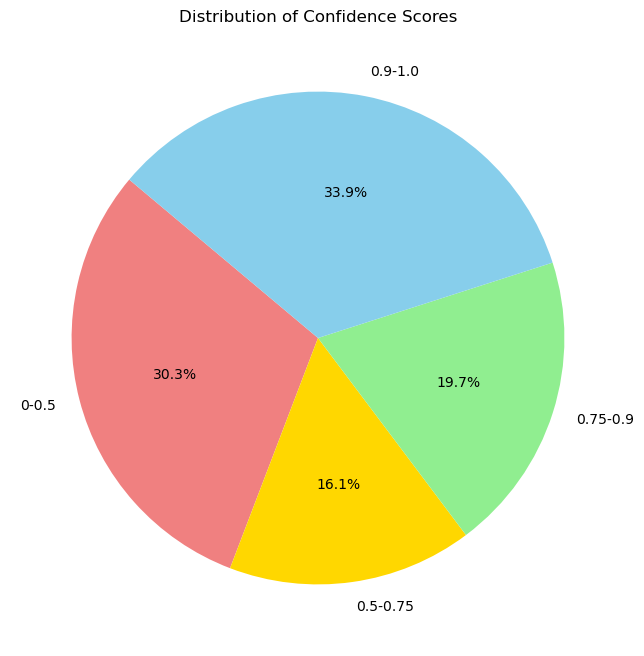

In [8]:
bins = [0, 0.5, 0.75, 0.9, 1.0]
labels = ['0-0.5', '0.5-0.75', '0.75-0.9', '0.9-1.0']
confidence_categories = pd.cut(data['Confidence_Scores'], bins=bins, labels=labels)

confidence_summary = confidence_categories.value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(confidence_summary, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'gold', 'lightgreen', 'skyblue'])
plt.title('Distribution of Confidence Scores')
plt.show()